In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
data = pd.read_csv('online retail.csv', encoding = 'unicode_escape')

print(data.shape)

(532619, 8)


C:\Users\Khan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset = data.copy()

dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# This Dataset contains 532619 rows and 8 columns
dataset.shape

(532619, 8)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532619 entries, 0 to 532618
Data columns (total 8 columns):
InvoiceNo      532619 non-null object
StockCode      532619 non-null object
Description    531165 non-null object
Quantity       532619 non-null int64
InvoiceDate    532619 non-null object
UnitPrice      532619 non-null float64
CustomerID     397924 non-null float64
Country        532619 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 32.5+ MB


In [6]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,532619.000000,532619.000000,397924.000000
mean,10.240010,3.847635,15294.315171
std,159.573967,41.758101,1713.169877
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


# Check,How much Missing Data are there in dataset

In [7]:
def missingData():
    total = dataset.isnull().sum().sort_values(ascending = False)
    percent_1 = dataset.isnull().sum() / dataset.isnull().count() * 100
    percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis = 1, keys = ['Total','%'])
    return missing_data.head(10)

In [8]:
missingData()

,Total,%
CustomerID,134695,25.3
Description,1454,0.3
Country,0,0.0
UnitPrice,0,0.0
InvoiceDate,0,0.0
Quantity,0,0.0
StockCode,0,0.0
InvoiceNo,0,0.0


## Describe Function,represent only integer and float type Dataset; Lets examin above data
Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
    1. Quantity: 
        Total number of rows: 532619
        Mean of quantity : 10.24...
        Standard deviactio : 159.57...
        Minimum value in Quantity : -9600.00
        Maximum value in quantity : 80995.00
        It has 25% or less than 25% :1 values
        it has 50% or less than 50% : 3 values
        It has 75% or less 75 % : 10 values
Same analysis for rest of columns

In [9]:
## We can also analyse a single columns
dataset['Quantity'].describe()


count    532619.000000
mean         10.240010
std         159.573967
min       -9600.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

# We can also put data-type and percentile to be displayed with Subcribe

In [10]:
duplicateData = dataset.copy()

duplicateData.dropna(inplace = True)
perc =[.20, .40, .60, .80] 
# list of dtypes to include 
include =['object', 'float', 'int'] 
  
# calling describe method 
desc = duplicateData.describe(percentiles = perc, include = include) 
desc

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country
count,397924.0,397924,397924,397924,397924.000000,397924.000000,397924
unique,18538.0,3665,3877,17286,NaN,NaN,37
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14/11/2011 15:27,NaN,NaN,United Kingdom
freq,542.0,2035,2028,542,NaN,NaN,354345
mean,NaN,NaN,NaN,NaN,3.116174,15294.315171,NaN
std,NaN,NaN,NaN,NaN,22.096788,1713.169877,NaN
min,NaN,NaN,NaN,NaN,0.000000,12346.000000,NaN
20%,NaN,NaN,NaN,NaN,0.850000,13552.000000,NaN
40%,NaN,NaN,NaN,NaN,1.650000,14667.000000,NaN
50%,NaN,NaN,NaN,NaN,1.950000,15159.000000,NaN


## Now Lets Delve Deeper into the given Observation

1. Data Visualization:
    UnitPrice
    Lets see how unit prices vary for different items

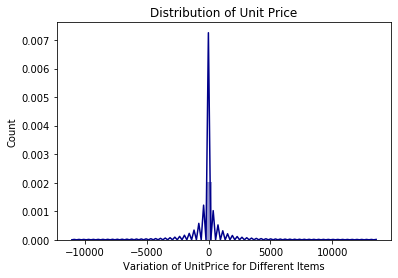

In [11]:
sns.distplot(dataset['UnitPrice'], color = 'darkblue')
plt.title("Distribution of Unit Price")
plt.xlabel("Variation of UnitPrice for Different Items")
plt.ylabel('Count')
plt.show()

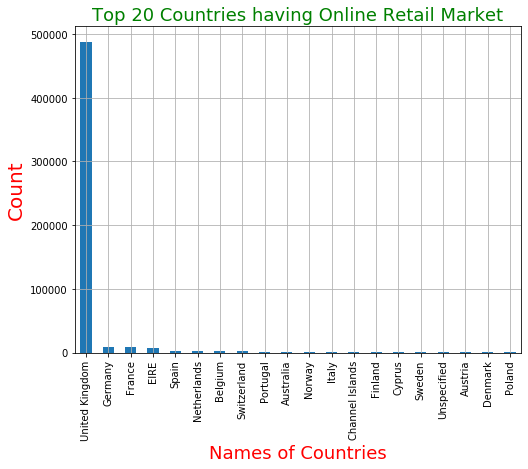

In [12]:
dataset['Country'].value_counts().head(20).plot(kind = 'bar', figsize = (8,6), grid = True)
plt.title('Top 20 Countries having Online Retail Market', fontsize = 18, color = 'green')
plt.xlabel('Names of Countries',fontsize = 18, color = 'red')
plt.ylabel('Count',fontsize = 20, color = 'red')
plt.show()


## Country Barr Graph
Here we can see that,United Kingdom deal more in retail, then germany and so on

## Similarli we can country who have very less dealing with retail

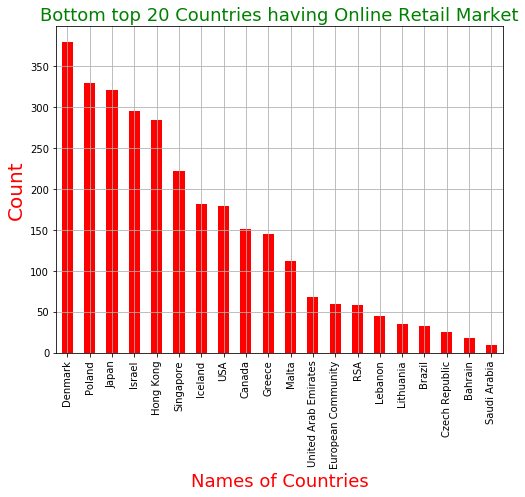

In [13]:
dataset['Country'].value_counts().tail(20).plot(kind = 'bar', figsize = (8,6), grid = True, color = 'red')
plt.title('Bottom top 20 Countries having Online Retail Market', fontsize = 18, color = 'green')
plt.xlabel('Names of Countries',fontsize = 18, color = 'red')
plt.ylabel('Count',fontsize = 20, color = 'red')
plt.show()


## Distribution of Sales accoross the country
Sales = quantity * unitPrice

Here we can, see that,that UnitPrice,Quantity do not have any null value,so that we can use it otherwise we had to fix missing value

In [14]:
missingData()

,Total,%
CustomerID,134695,25.3
Description,1454,0.3
Country,0,0.0
UnitPrice,0,0.0
InvoiceDate,0,0.0
Quantity,0,0.0
StockCode,0,0.0
InvoiceNo,0,0.0


In [15]:
dataset['Sales'] = dataset['UnitPrice'] * dataset['Quantity']
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,1/12/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,1/12/2010 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,1/12/2010 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,1/12/2010 8:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1/12/2010 8:34,1.69,13047.0,United Kingdom,54.08


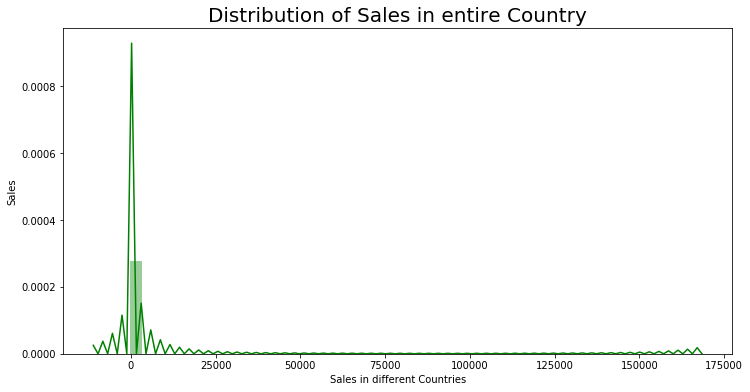

In [16]:
## Lets See Sales Distribution
fig, axe = plt.subplots(nrows = 1,ncols = 1, figsize = (12,6))
sns.distplot(dataset['Sales'], color = 'green')
plt.title('Distribution of Sales in entire Country', fontsize = 20,)
plt.xlabel('Sales in different Countries')
plt.ylabel('Sales')
plt.show()

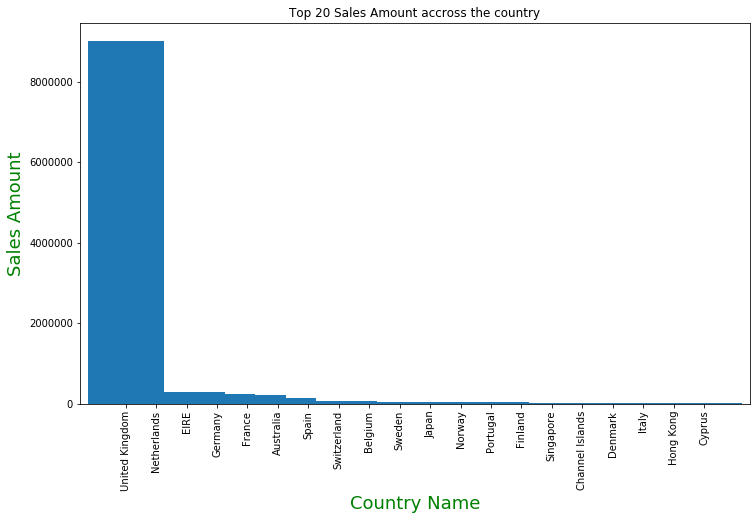

In [17]:
 salesData = dataset.groupby('Country')['Sales'].sum().sort_values(ascending=False).astype('int').head(20).plot(kind = 'bar',width = 2.5,figsize = (12, 7))
plt.title("Top 20 Sales Amount accross the country")
plt.xlabel("Country Name",color = 'green', fontsize = 18)
plt.ylabel("Sales Amount",color = 'green',fontsize = 18)
plt.show()

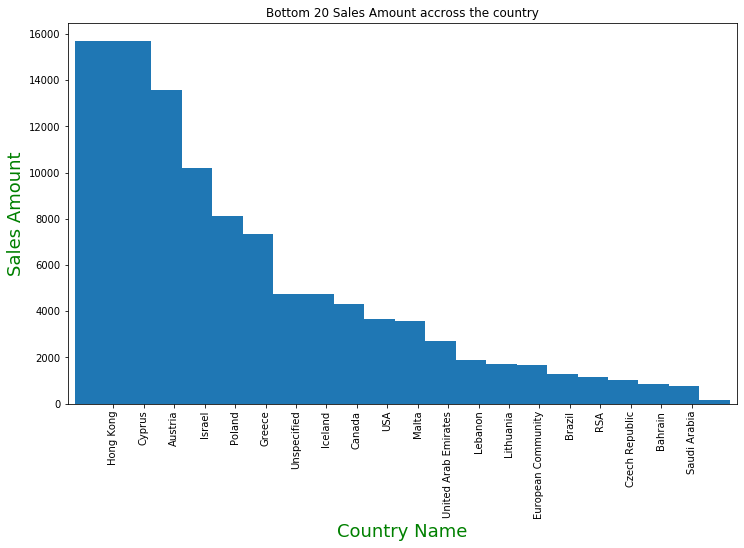

In [18]:
 salesData = dataset.groupby('Country')['Sales'].sum().sort_values(ascending=False).astype('int').tail(20).plot(kind = 'bar',figsize = (12, 7),width = 2.5)
plt.title("Bottom 20 Sales Amount accross the country")
plt.xlabel("Country Name",color = 'green', fontsize = 18)
plt.ylabel("Sales Amount",color = 'green',fontsize = 18)
plt.show()

Here We can See that United Kingdom Sales' amount is much greater then any other country,

in Second Graph, we can see,Hongkong is on top

In [19]:
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,1/12/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,1/12/2010 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,1/12/2010 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,1/12/2010 8:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1/12/2010 8:34,1.69,13047.0,United Kingdom,54.08


## Lets See, 

In [20]:
import datetime
dataset['month'] = pd.DatetimeIndex(dataset['InvoiceDate']).month
dataset['year'] = pd.DatetimeIndex(dataset['InvoiceDate']).year

# Lets Plot Bar graph to represent Data

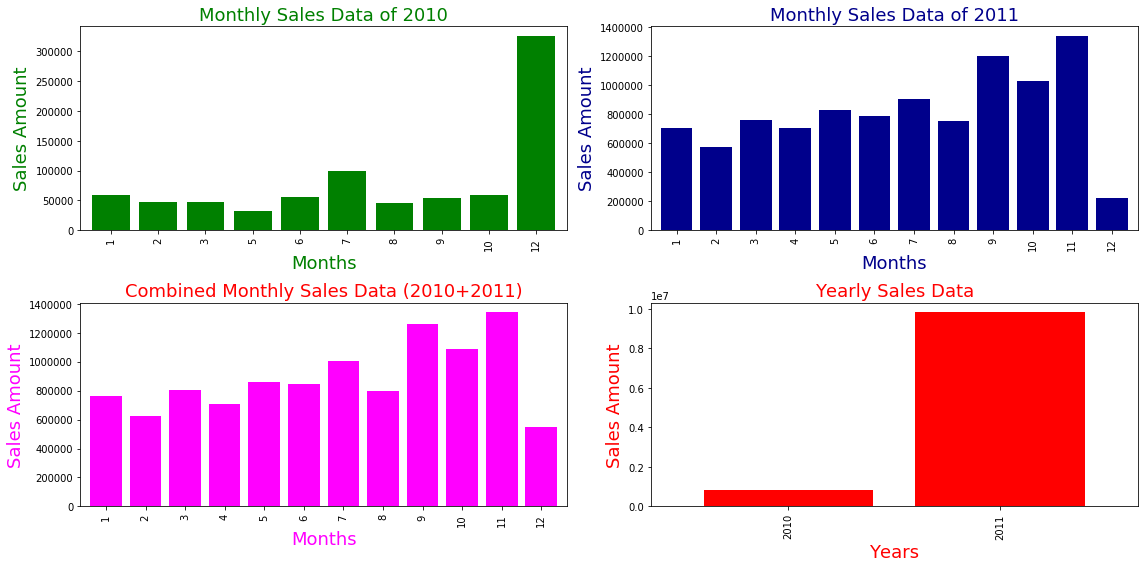

In [21]:
import calendar
#dataset['MonthName'] = dataset['month'].apply(lambda x: calendar.month_abbr[x])
fig,axes = plt.subplots(2,2,figsize = (10,8))
dataset[dataset['year'] == 2010].groupby('month')['Sales'].sum().plot(kind = 'bar',figsize = (16, 8),width = 0.80,ax = axes[0][0],color = 'green')
axes[0][0].set_title("Monthly Sales Data of 2010",color = 'green', fontsize = 18)
axes[0][0].set_xlabel("Months",color = 'green', fontsize = 18)
axes[0][0].set_ylabel("Sales Amount",color = 'green',fontsize = 18)

dataset[dataset['year'] == 2011].groupby('month')['Sales'].sum().plot(kind = 'bar',figsize = (16, 8),width = 0.80,ax = axes[0][1],color='darkblue')
axes[0][1].set_title("Monthly Sales Data of 2011",color = 'darkblue', fontsize = 18)
axes[0][1].set_xlabel("Months",color = 'darkblue', fontsize = 18)
axes[0][1].set_ylabel("Sales Amount",color = 'darkblue',fontsize = 18)

dataset.groupby('month')['Sales'].sum().plot(kind = 'bar',figsize = (16, 8),width = 0.80,ax = axes[1][0],color='magenta')
axes[1][0].set_title("Combined Monthly Sales Data (2010+2011)",color = 'red', fontsize = 18)
axes[1][0].set_xlabel("Months",color = 'magenta', fontsize = 18)
axes[1][0].set_ylabel("Sales Amount",color = 'magenta',fontsize = 18)

dataset.groupby('year')['Sales'].sum().plot(kind = 'bar',figsize = (16, 8),width = 0.80,ax = axes[1][1],color='red')
axes[1][1].set_title("Yearly Sales Data",color = 'red', fontsize = 18)
axes[1][1].set_xlabel("Years",color = 'red', fontsize = 18)
axes[1][1].set_ylabel("Sales Amount",color = 'red',fontsize = 18)
fig.tight_layout()
plt.show()

## Lets Go deeper into Graph:
## Monthly Sale Data of 2010:
* First, in the year 2010, there is no sale in the month of 'April, November' therefore, this two month is missing,
* Second, in the year 2010, there is drastic sale growth in the month of December, and also little growth in June Month
## Monthly Sale Data of 2011:
* First, in the year 2011, there are excellent growth in every month as compared to the year 2010
* Secondly, we can see that, in the month of 'September' and 'November' sale had increased up to two times as compared to previous months
## Combined Monthly Sale Data
* Here, we can see that sales increased in the month of 'July','September','November'
## Yearly Sale Data
* Here, the picture is Clear, Sale has grown up in the year 2011


    



In [22]:
# Get the Month name of given month number
def getMOnthName(monthNumbers):
    monthNames = [calendar.month_abbr[x] for x in monthNumbers]
    return monthNames
    

## Lets Draw Pie Char for more clearity

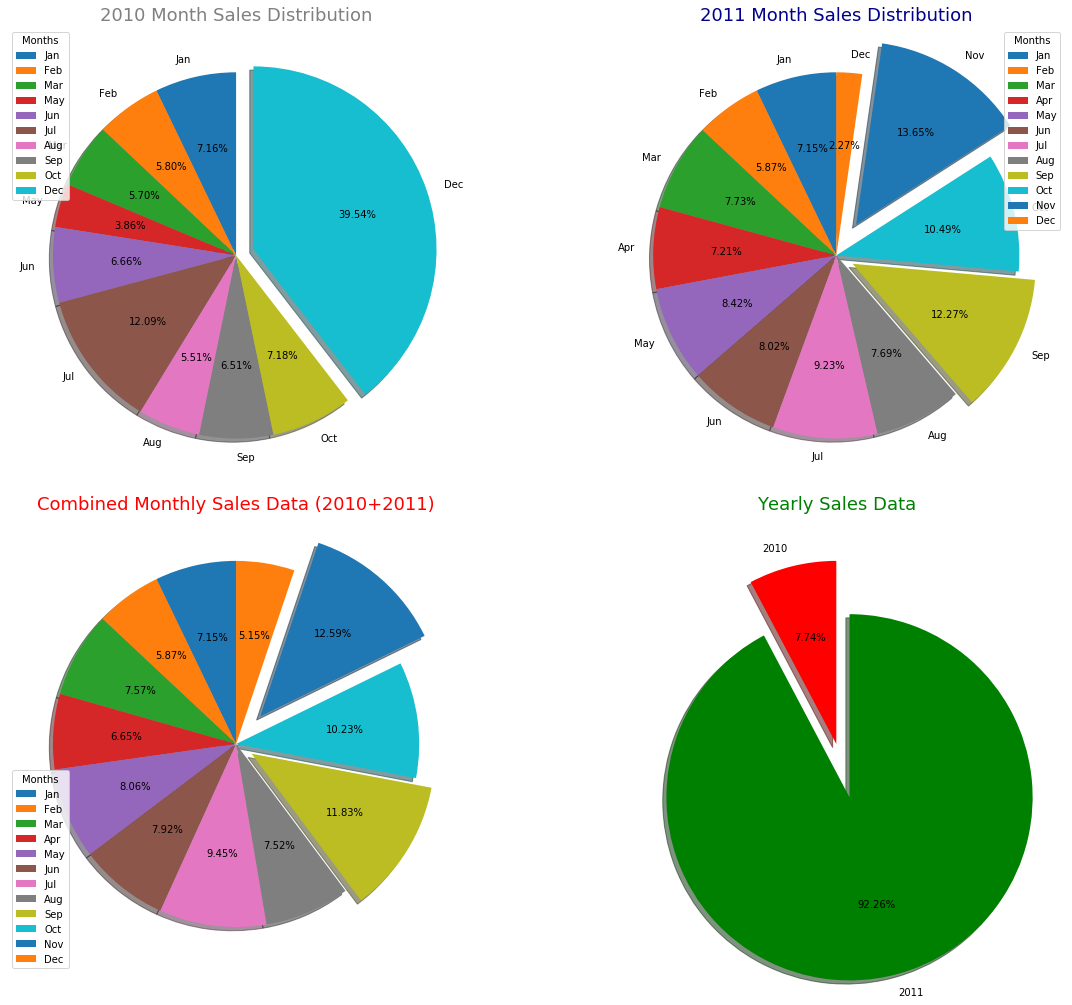

In [23]:

explodeMonth2010 = (0,0,0,0,0,0,0,0,0,0.1)
fig,axes = plt.subplots(2,2,figsize = (18,14))
monthData2010 = dataset[dataset['year'] == 2010].groupby('month')['Sales'].sum()
monthNames2010 = getMOnthName(monthData2010.index.values)
axes[0][0].pie(monthData2010.values, labels = monthNames2010,autopct='%1.2f%%',shadow=True, startangle=90,explode = explodeMonth2010)
axes[0][0].set_title('2010 Month Sales Distribution',color = 'gray', fontsize = 18)
axes[0][0].legend(loc="upper left", title="Months")

explodeMonth2011 = (0,0,0,0,0,0,0,0,0.1,0,0.2,0)
monthData2011 = dataset[dataset['year'] == 2011].groupby('month')['Sales'].sum()
monthNames2011 = getMOnthName(monthData2011.index.values)
axes[0][1].pie(monthData2011.values,labels = monthNames2011,autopct='%1.2f%%',shadow=True, startangle=90,explode = explodeMonth2011)
axes[0][1].set_title("2011 Month Sales Distribution",color = 'darkblue', fontsize = 18)
axes[0][1].legend(loc="upper right", title="Months",labels = monthNames2011)

combinedData = dataset.groupby('month')['Sales'].sum()
combinedMonthNames = getMOnthName(combinedData.index.values)
axes[1][0].pie(combinedData.values,autopct='%1.2f%%',shadow=True, startangle=90,explode = explodeMonth2011)
axes[1][0].set_title("Combined Monthly Sales Data (2010+2011)",color = 'red', fontsize = 18)
axes[1][0].legend(loc="lower left", title="Months",labels = combinedMonthNames)

explodeYearData = (0,0.3)
data2010_2011 = dataset.groupby('year')['Sales'].sum()
axes[1][1].pie(data2010_2011.values, labels = data2010_2011.index.values,autopct='%1.2f%%',shadow=True,explode = explodeYearData, startangle=90,colors = ['red','green'])
axes[1][1].set_title("Yearly Sales Data",color = 'green', fontsize = 18)

fig.tight_layout()
plt.show()

## Lets Go deeper into Graph:
## Monthly Sale Data of 2010:
* First, in the year 2010, there is no sale in the month of 'April, November' therefore, this two month is missing,
* Second, in the year 2010, there is drastic sale growth in the month of December, and also little growth in June Month
## Monthly Sale Data of 2011:
* First, in the year 2011, there are excellent growth in every month as compared to the year 2010
* Secondly, we can see that, in the month of 'September' and 'November' sale had increased up to two times as compared to previous months
## Combined Monthly Sale Data
* Here, we can see that sales increased in the month of 'July','September','November'
## Yearly Sale Data
* Here, the picture is Clear, Sale has grown up in the year 2011


    

